<a href="https://colab.research.google.com/github/GabrielxKuek/neural-network-classification-tutorial/blob/main/diabetes_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('sup')

sup


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [25]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


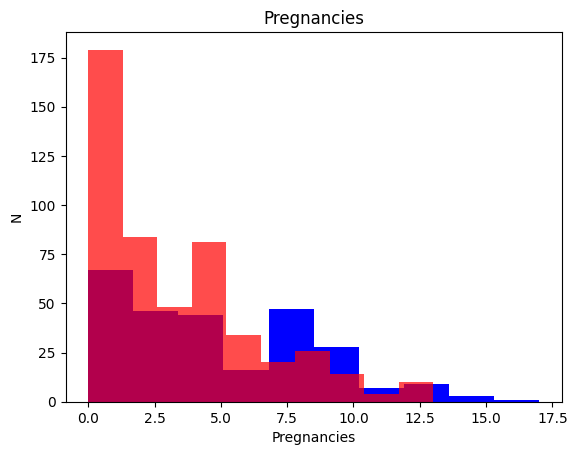

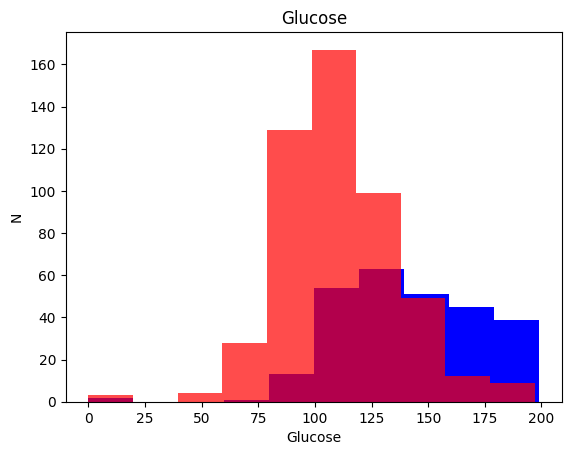

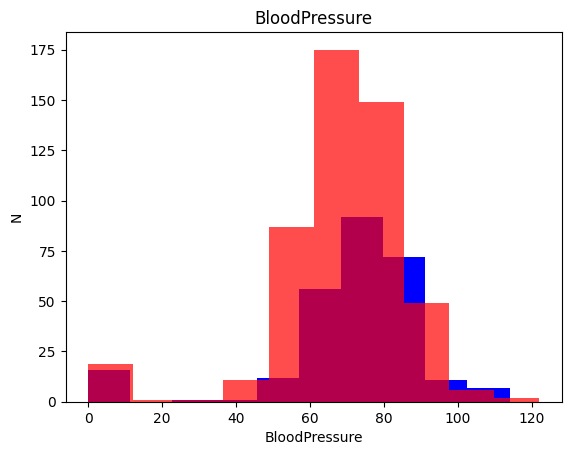

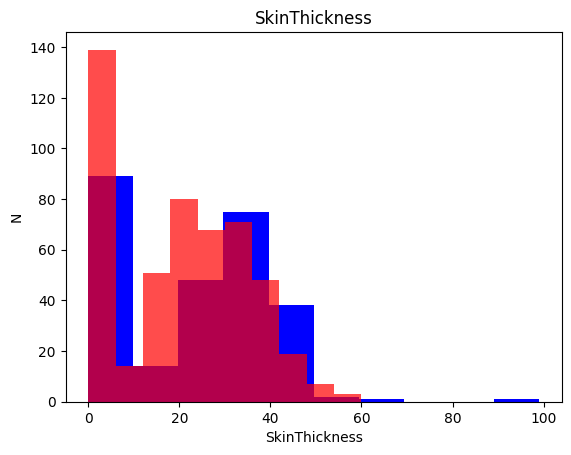

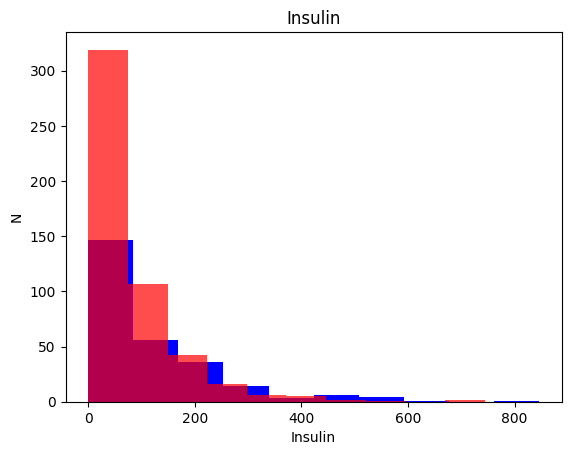

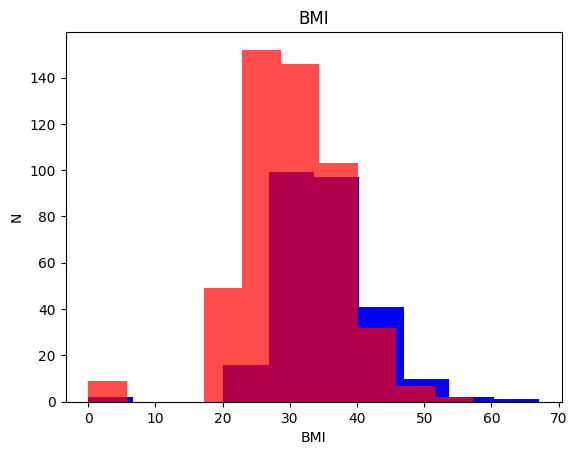

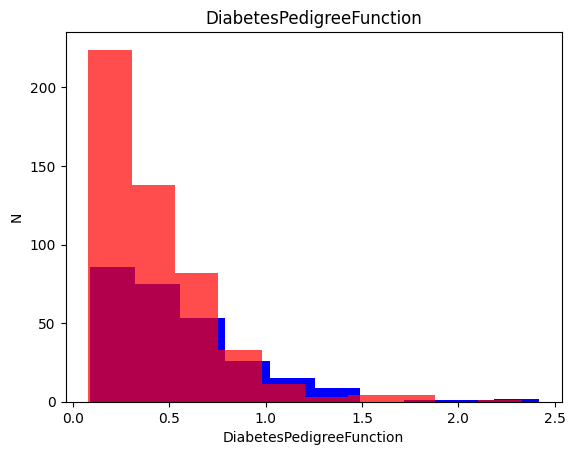

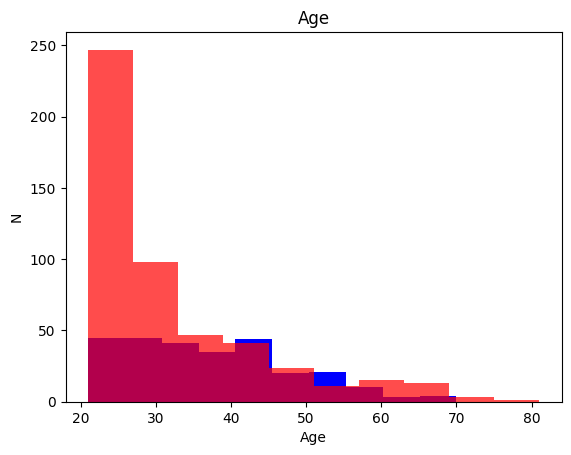

In [21]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes')
    plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.7)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend
    plt.show()

In [42]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [45]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [50]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [51]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [54]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.4, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 0)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [56]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [57]:
model.evaluate(x_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5623 - loss: 0.7010  


[0.6943619251251221, 0.5766666531562805]

In [58]:
model.evaluate(x_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6793 


[0.6691728234291077, 0.6399999856948853]

In [59]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6102 - loss: 0.6766 - val_accuracy: 0.6450 - val_loss: 0.6263
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6255 - loss: 0.6455 - val_accuracy: 0.6550 - val_loss: 0.5993
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.6016 - val_accuracy: 0.7100 - val_loss: 0.5705
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7311 - loss: 0.5833 - val_accuracy: 0.7250 - val_loss: 0.5439
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.5690 - val_accuracy: 0.7600 - val_loss: 0.5203
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7297 - loss: 0.5735 - val_accuracy: 0.7700 - val_loss: 0.4996
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.5412 - val_accuracy: 0.7750 - val_loss: 0.4841
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.5261 - val_accuracy: 0.7700 - val_loss:

In [60]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7614 - loss: 0.4773


[0.4918994605541229, 0.7699999809265137]